In [4]:
import torch
import os
os.makedirs(os.path.join('..','data'), exist_ok = True)
data_file = os.path.join('..','data','house.csv')
with open(data_file, 'w') as f:
    f.write('num, rode, price\n' )
    f.write('NA, r, 12\n')
    f.write('NA, r, 12\n')
    f.write('NA, r, 12\n')
import pandas

data = pandas.read_csv(data_file)
print(data)




   num  rode   price
0  NaN     r      12
1  NaN     r      12
2  NaN     r      12


In [6]:
A = torch.arange(20).reshape(5, 4)
A


tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [7]:
A.T


tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [8]:
A == A.T

RuntimeError: The size of tensor a (4) must match the size of tensor b (5) at non-singleton dimension 1

In [9]:
A == A.T

RuntimeError: The size of tensor a (4) must match the size of tensor b (5) at non-singleton dimension 1

In [10]:
A.sum()

tensor(190)

In [12]:
A.shape


torch.Size([5, 4])

In [19]:
a = torch.ones(2,5,4)
a.sum(axis = 0)

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])

In [20]:
x = torch.arange(4.0)
x


tensor([0., 1., 2., 3.])

In [22]:
x.requires_grad_(True)
x.grad

In [23]:
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [38]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [39]:
def synthetic_data(w, b, num_example):
    x = torch.normal(0,1, (num_example, len(w)))
    y = torch.matmul(x,w) + b
    y = y + torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, lables = synthetic_data(true_w, true_b, 1000)

In [40]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy),lable.detach().numpy(), 1);

SyntaxError: unmatched ')' (2209667285.py, line 2)

In [34]:
print(x)

tensor([0., 1., 2., 3.], requires_grad=True)


In [35]:
featrues

NameError: name 'featrues' is not defined

In [36]:
features

tensor([[-1.0401, -0.6220],
        [-0.6707, -1.3379],
        [-0.3336,  0.1319],
        ...,
        [-2.6248, -1.6898],
        [-0.9602, -1.4513],
        [ 0.3165, -0.5760]])

In [41]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [42]:
def synthetic_data(w, b, num_example):
    x = torch.normal(0,1, (num_example, len(w)))
    y = torch.matmul(x,w) + b
    y = y + torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, lables = synthetic_data(true_w, true_b, 1000)

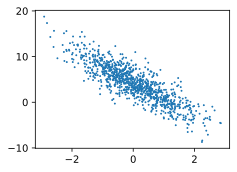

In [51]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),lables.detach().numpy(), 1);

In [55]:
def data_iter(batch_size, feature, lable):
    num_example = len(feature)
    indices = list(range(num_example))
    random.shuffle(indices)
    for i in range(0, num_example, batch_size):
        batch_indices = torch.tensor(
        indices[i:min(i + batch_size, num_example)])
        yield features[batch_indices], lable[batch_indices]
batch_size = 10

for x, y in data_iter(batch_size, features, lables):
    print(x,'\n',y)
    break

tensor([[-1.2791,  0.3393],
        [ 2.1798,  0.7860],
        [ 0.3487, -1.4231],
        [ 1.7148, -1.1341],
        [ 1.4212, -1.5787],
        [-0.1518,  0.3084],
        [-0.4204, -0.6520],
        [ 0.1036, -0.2202],
        [-1.0672, -1.0807],
        [ 0.2505, -2.3053]]) 
 tensor([[ 0.5044],
        [ 5.8854],
        [ 9.7363],
        [11.4908],
        [12.4080],
        [ 2.8551],
        [ 5.5786],
        [ 5.1658],
        [ 5.7353],
        [12.5411]])


In [60]:
w = torch.normal(0, 0.01, size = (2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
def linreg(x, w, b):
    return torch.matmul(x, w) + b
def square_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2/2
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
 

In [63]:
lr = 0.03
num_epochs = 3
net = linreg
loss = square_loss

for epoch in range(num_epochs):
    for x, y in data_iter(batch_size, features, lables):
        l = loss(net(x, w, b), y)
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_1 = loss(net(features, w, b), lables)
        print(f'epoch{epoch + 1}, loss {float(train_1.mean()):f}')

epoch1, loss 0.000148
epoch2, loss 0.000050
epoch3, loss 0.000050


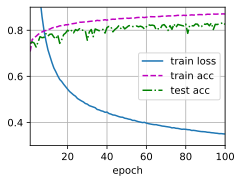

In [8]:
import torch;
from torch import nn;
from d2l import torch as d2l;

batch_size = 256;
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size);
num_inputs, num_outputs, num_hiddens = 784, 10, 256;

w1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True));
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True));
w2 = nn.Parameter(torch.randn(num_hiddens, num_outputs,requires_grad=True))
b2 = nn.Parameter(torch.zeros(num_outputs,requires_grad=True));
params = [w1, b1, w2, b2];

def relu(X):
    a = torch.zeros_like(X);
    return torch.max(X,a);

def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X @ w1 + b1);
    return (H @ w2 + b2);

loss = nn.CrossEntropyLoss();

num_epochs, lr = 100, 0.1;
updater = torch.optim.SGD(params, lr = lr);
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,updater);

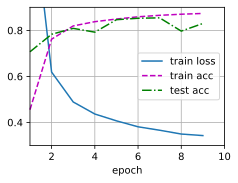

In [ ]:
import torch;
from torch import nn;
from d2l import torch as d2l;

dropout1, dropout2 = 0, 0
lr = 0.5
num_epochs = 10;
batch_size = 256;
net = nn.Sequential(
nn.Flatten(), nn.Linear(784, 256), nn.ReLU(),
nn.Dropout(dropout1), nn.Linear(256,256),nn.ReLU(),
nn.Dropout(dropout2), nn.Linear(256,10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights)
trainer = torch.optim.SGD(net.parameters(), lr = lr)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
loss = nn.CrossEntropyLoss()
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,updater = trainer);

In [18]:
import hashlib
import os
import tarfile
import zipfile
import requests

DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/';

def download(name, cache_dir = os.path.join('..','data')):
    assert name in DATA_HUB, f"{name} 不存在于{DATA_HUB}."
    url, shal_hash = DATA_HUB[name]
    os.makedirs(cache_dir, exist_ok = True)
    fname = os.path.join(cache_dir, url.split('/')[-1])
    if os.path.exists(fname):
        shal = hashlib.shal()
        with open(fname, 'rb') as f:
            while True:
                data = f.read(1048576)

%matplotlib inline
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

DATA_HUB['kaggle_house_train'] = (DATA_URL + 'kaggle_house_pred_train.csv',
                                 '585e9cc93e70b39160e7921475f9bcd7d31219ce')
DATA_HUB['kaggle_house_test'] = (DATA_URL + 'kaggle_house_pred_test.csv','fa19780a7b011d9b009e8bff8e99922a8ee2eb90')
train_data = pd.read_csv(r'workspace\data\kaggle_house_train')
test_data = pd.read_csv(r'workspace\data\kaggle_house_pred_test.csv')
print(train_data.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'workspace\\data\\kaggle_house_train'

(1460, 81)
(1459, 80)
(2919, 331)
   SaleCondition_Partial
1                      0
2                      0
折1，训练log rmse0.169907, 验证log rmse0.156370
折2，训练log rmse0.162118, 验证log rmse0.190257
折3，训练log rmse0.163484, 验证log rmse0.168048
折4，训练log rmse0.169111, 验证log rmse0.155059
折5，训练log rmse0.162468, 验证log rmse0.182811
5-折验证: 平均训练log rmse: 0.165418, 平均验证log rmse: 0.170509


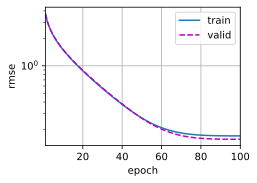

In [9]:
import hashlib
import os
import tarfile
import zipfile
import requests
 
#@save
DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'
def download(name, cache_dir=os.path.join('..', 'data')):  #@save
    """下载一个DATA_HUB中的文件，返回本地文件名"""
    assert name in DATA_HUB, f"{name} 不存在于 {DATA_HUB}"
    url, sha1_hash = DATA_HUB[name]
    os.makedirs(cache_dir, exist_ok=True)
    fname = os.path.join(cache_dir, url.split('/')[-1])
    if os.path.exists(fname):
        sha1 = hashlib.sha1()
        with open(fname, 'rb') as f:
            while True:
                data = f.read(1048576)
                if not data:
                    break
                sha1.update(data)
        if sha1.hexdigest() == sha1_hash:
            return fname  # 命中缓存
    print(f'正在从{url}下载{fname}...')
    r = requests.get(url, stream=True, verify=True)
    with open(fname, 'wb') as f:
        f.write(r.content)
    return fname
def download_extract(name, folder=None):  #@save
    """下载并解压zip/tar文件"""
    fname = download(name)
    base_dir = os.path.dirname(fname)
    data_dir, ext = os.path.splitext(fname)
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r')
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r')
    else:
        assert False, '只有zip/tar文件可以被解压缩'
    fp.extractall(base_dir)
    return os.path.join(base_dir, folder) if folder else data_dir
 
def download_all():  #@save
    """下载DATA_HUB中的所有文件"""
    for name in DATA_HUB:
        download(name)
        # 如果你没有安装pandas，请取消下一行的注释
# !pip install pandas
 
%matplotlib inline
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l
DATA_HUB['kaggle_house_train'] = (  #@save
    DATA_URL + 'kaggle_house_pred_train.csv', '585e9cc93e70b39160e7921475f9bcd7d31219ce')
 
DATA_HUB['kaggle_house_test'] = (  #@save
    DATA_URL + 'kaggle_house_pred_test.csv',
    'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')
train_data = pd.read_csv(download('kaggle_house_train'))
test_data = pd.read_csv(download('kaggle_house_test'))
print(train_data.shape)
print(test_data.shape)
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))
# 若无法获得测试数据，则可根据训练数据计算均值和标准差
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# 在标准化数据之后，所有均值消失，因此我们可以将缺失值设置为0
all_features[numeric_features] = all_features[numeric_features].fillna(0)
# “Dummy_na=True”将“na”（缺失值）视为有效的特征值，并为其创建指示符特征
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32)
train_labels = torch.tensor(
    train_data.SalePrice.values.reshape(-1, 1), dtype=torch.float32)
loss = nn.MSELoss()
in_features = train_features.shape[1]
print(all_features.shape)
print(all_features.iloc[1:3, 329:-1])
def get_net():
    net = nn.Sequential(nn.Linear(in_features,1))
    return net
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

In [12]:
import torch
from torch import nn
from torch.nn import functional as F

class MLP(nn.Module):
    def __init__(self):
        super().__init__();
        self.hidden = nn.Linear(20,256);
        self.out = nn.Linear(256,10);
    def forward(self, X):
        return self.out(F.relu(self.hidden(X)));
X = torch.rand(2,20);
net = MLP();
print(net(X));

tensor([[ 0.1256,  0.0254, -0.3098, -0.0769,  0.2357, -0.0004, -0.0081, -0.1321,
         -0.0035,  0.0516],
        [ 0.0511,  0.1464,  0.0056,  0.0019,  0.2503, -0.0426,  0.0105, -0.0439,
          0.0639, -0.1209]], grad_fn=<AddmmBackward0>)


In [14]:
x = torch.arange(4);
torch.save(x, 'x-file');
x2 = torch.load('x-file');
print(x2);

tensor([0, 1, 2, 3])


In [37]:
import torch
from torch import nn
from torch.nn import functional as F
class MLP(nn.Module):
    def __init__(self):
         super().__init__()
         self.hidden = nn.Linear(20,256)
         self.output = nn.Linear(256,10)
      
    def forward(self, X):
        return self.output(F.relu(self.hidden(X)))
net = MLP()
X = torch.randn(size = (2,20))
y = net(X);
torch.save(net.state_dict(), 'mlp.params')

In [38]:
print(y)

tensor([[-0.4146, -0.3582, -0.4416, -0.0589, -0.1272,  0.3771, -0.6444, -0.0809,
          0.5349, -0.5459],
        [-0.3375,  0.0890, -0.2066, -0.1351,  0.1968,  0.4000, -0.0539,  0.1023,
          0.2380, -0.0333]], grad_fn=<AddmmBackward0>)


In [28]:
clone = MLP()
clone.load_state_dict(torch.load("mlp.params"))
clone.eval()

MLP(
  (hidden): Linear(in_features=20, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [45]:
Y = net(X)
Y_clone = clone(X)
print(Y_clone == Y)

tensor([[False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False]])


In [48]:
!nvidia-smi

'nvidia-smi' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [54]:
import torch
from torch import nn

torch.device('cpu'), torch.cuda.device('cuda'),torch.cuda.device('cuda:1')

(device(type='cpu'),
 <torch.cuda.device at 0x210dcb6f6d0>)

In [56]:
torch.cuda.device_count()

0

In [57]:
x = torch.tensor([1,2,3])
x.device

device(type='cpu')

In [1]:
import torch
from torch import nn

def comp_conv2d(conv2d, X):
    X = X.reshape((1,1) + X.shape)
    Y = conv2d(X)
    return Y.reshape(Y.shape[2:])
conv2d = nn.Conv2d(1, 1, kernel_size = 3, padding = 1)
x = torch.rand(size = (8, 8))
comp_conv2d(conv2d, x).shape


torch.Size([8, 8])

In [2]:
conv2d = nn.Conv2d(1,1,kernel_size = 3, padding = 1, stride = 2)
comp_conv2d(conv2d,x).shape


torch.Size([4, 4])

In [3]:
conv2d = nn.Conv2d(1,1,kernel_size = (3,5), padding = (0,1), stride = (3,4))
comp_conv2d(conv2d,x).shape

torch.Size([2, 2])

TypeError: tensor() takes 1 positional argument but 2 were given

torch.Size([3, 1, 2, 2, 2])

In [20]:
import torch
from torch import nn
from d2l import torch as d2l

def pool2d(X, pool_size, mode = 'max'):
    p_h, p_w = pool_size;
    Y = torch.zeros(X.shape[0] - p_h + 1, X.shape[1] - p_w + 1)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] =X[i:i + p_h, j:j + p_w].max()
            elif mode == 'avg':
                    Y[i, j] = X[i:i + p_h, j:j +p_w].mean()
    return Y

In [21]:
X = torch.tensor([[0, 1, 2], [3,4,5], [6,7,8]])
pool2d(X, (2,2))

tensor([[4., 5.],
        [7., 8.]])

In [22]:
pool2d(X,(2,2), 'avg')

RuntimeError: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long

In [23]:
X = torch.arange(16, dtype = torch.float32).reshape(1,1,4,4)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [26]:
pool2d = nn.MaxPool2d(3)
print(pool2d(X));

tensor([[[[10.]]]])


In [28]:
pool2d = nn.MaxPool2d(3, padding = 1, stride = 2)
print(pool2d(X));

tensor([[[[ 5.,  7.],
          [13., 15.]]]])


In [31]:
pool2d = nn.MaxPool2d((2,3), padding = (1,1), stride = (2,3))
print(pool2d(X))

tensor([[[[ 1.,  3.],
          [ 9., 11.],
          [13., 15.]]]])


In [32]:
X = torch.cat((X, X+1), 1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [34]:
pool2d = nn.MaxPool2d(3, padding = 1, stride = 2)
print(pool2d(X));


tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])


In [35]:
class Reshape(torch.nn.Module):
    def forward(self, x):
        return x.view(-1, 1, 28, 28)
net = torch.nn.Sequential(
Reshape(), nn.Conv2d(1, 6, kernel_size = 5, padding = 2), nn.Sigmoid(),
nn.AvgPool2d(kernel_size = 2, stride = 2),
nn.Conv2d(6, 16, kernel_size = 5), nn.Sigmoid(),
nn.AvgPool2d(kernel_size = 2, stride = 2),nn.Flatten(),
nn.Linear(16*5*5, 120), nn.Sigmoid(),
nn.Linear(120, 84), nn.Sigmoid(),
nn.Linear(84, 10))




In [41]:
X = torch.rand(size = (1,1,28,28), dtype = torch.float32)
for layer in net:
    X = layer(X)
    print(X.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 6, 28, 28])
torch.Size([1, 6, 28, 28])
torch.Size([1, 6, 14, 14])
torch.Size([1, 16, 10, 10])
torch.Size([1, 16, 10, 10])
torch.Size([1, 16, 5, 5])
torch.Size([1, 400])
torch.Size([1, 120])
torch.Size([1, 120])
torch.Size([1, 84])
torch.Size([1, 84])
torch.Size([1, 10])


In [42]:
torch.cuda.device_count()

0

In [45]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size = batch_size)

def evaluate_accuracy_gpu(net, data_iter, device = None):
    if isinstance(net, torch.nn.Module):
        net.eval()
        if not device:
            device = next(iter(net.paramter())).device
        metric = d2l.Accumulator(2)
        for X, y in data_iter:
            if isinstance(X, list):
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
nn.Conv2d(1,96,kernel_size = 11, stride = 4, padding = 1), nn.ReLU(),
nn.MaxPool2d(kernel_size = 3, stride = 2),
nn.Conv2d(96,256,kernel_size = 5, padding = 2),nn.ReLU(),
nn.MaxPool2d(kernel_size = 3, stride = 2),
nn.Conv2d(256,384,kernel_size = 3, padding = 1),nn.ReLU(),
nn.Conv2d(384,384,kernel_size = 3, padding = 1),nn.ReLU(),
nn.Conv2d(384,256,kernel_size = 3, padding = 1),nn.ReLU(),
nn.MaxPool2d(kernel_size = 3, stride = 2),nn.Flatten(),
nn.Linear(6400, 4096), nn.ReLU(),nn.Dropout(p = 0.5),
nn.Linear(4096, 4096), nn.ReLU(),nn.Dropout(p = 0.5),
nn.Linear(4096,10))

In [4]:
X = torch.randn(1,1,224,224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

In [3]:
batch_size = 2
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize = 224)

In [3]:
lr, num_epochs = 0.01, 10
train_ch6(net, train_iter, test_iter, num_epochs, lr,d2l.try_gpu())

NameError: name 'train_ch6' is not defined

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

# 定义网络
net = nn.Sequential(
    nn.Conv2d(1,96,kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96,256,kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256,384,kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384,256,kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    nn.Linear(4096,10))

# 加载数据
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size, resize=224)

# 将模型和数据放在 GPU 上
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Training on', device)
net.to(device)


# 训练模型
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, device=device)


Training on cpu
training on cpu


In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

# 定义网络
net = nn.Sequential(
    nn.Conv2d(1,96,kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96,256,kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256,384,kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384,256,kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    nn.Linear(4096,10))

# 加载数据
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size, resize=224)

# 将模型和数据放在 GPU 上
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Training on', device)
net.to(device)

# 训练模型
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, device=device)

In [11]:
# 训练模型 VGG
import torch
from torch import nn
from d2l import torch as d2l

def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLu())
        in_channels = out_channels
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        return nn.Sequential(*layers)


AttributeError: module 'torch.nn' has no attribute 'ReLu'

NameError: name 'net' is not defined

In [19]:
# 训练模型 VGG
import torch
from torch import nn
from d2l import torch as d2l

def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        return nn.Sequential(*layers)
conv_arch = ((1,64), (1,128), (2,256), (2,512), (2,512))

def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(
            num_convs, in_channels, out_channels))
        in_channels = out_channels
    return nn.Sequential(
         *conv_blks, nn.Flatten(),
         nn.Linear(out_channels * 7 * 7, 4096),nn.ReLU(),
         nn.Dropout(0.5), nn.Linear(4096, 4096),nn.ReLU(),
         nn.Dropout(0.5), nn.Linear(4096, 10))

net = vgg(conv_arch)

X = torch.randn(size = (1,1,224,224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])
